# ResNet50

In [29]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score
DS_LABELS = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway","Industrial","Pasture","PermanentCrop",
             "Residential", "River", "SeaLake"]

In [30]:
df_train = pd.read_csv("finished\ResNet50_new\\train_data.csv")
df_train.head()

,train loss,test loss,train accuracy,test accuracy
0,0.634795,0.377158,0.797324,0.884554
1,0.339237,0.291960,0.891392,0.912784
2,0.257567,0.475366,0.915979,0.853057
3,0.202155,0.162194,0.930785,0.946437
4,0.182998,0.130630,0.940461,0.956423


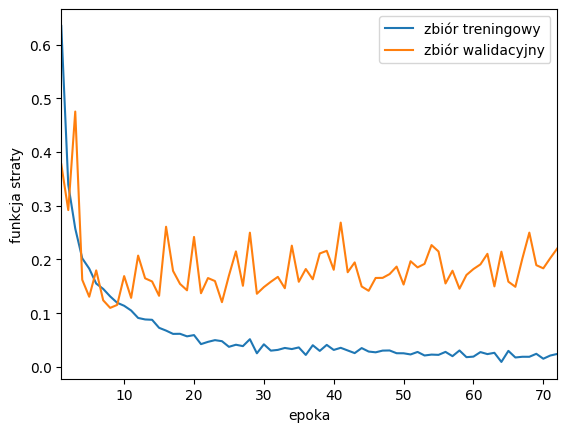

In [31]:
plt.plot(df_train.index+1, df_train["train loss"], label = "zbiór treningowy")
plt.plot(df_train.index+1, df_train["test loss"], label = "zbiór walidacyjny")
plt.xlim([1,len(df_train)])
plt.legend()
plt.xlabel("epoka")
plt.ylabel("funkcja straty")
plt.show()

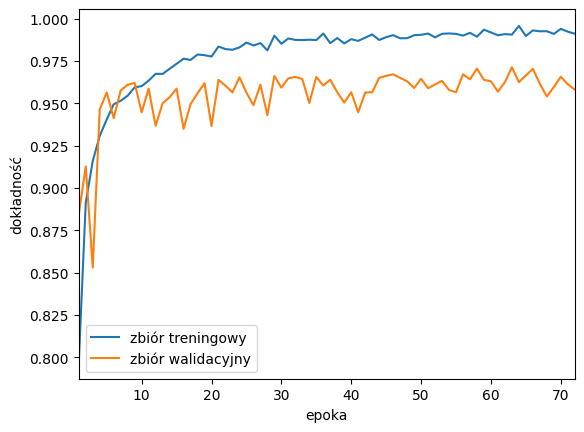

In [32]:
plt.plot(df_train.index+1, df_train["train accuracy"], label = "zbiór treningowy")
plt.plot(df_train.index+1, df_train["test accuracy"], label = "zbiór walidacyjny")
plt.xlim([1,len(df_train)])
plt.legend()
plt.xlabel("epoka")
plt.ylabel("dokładność")
plt.show()

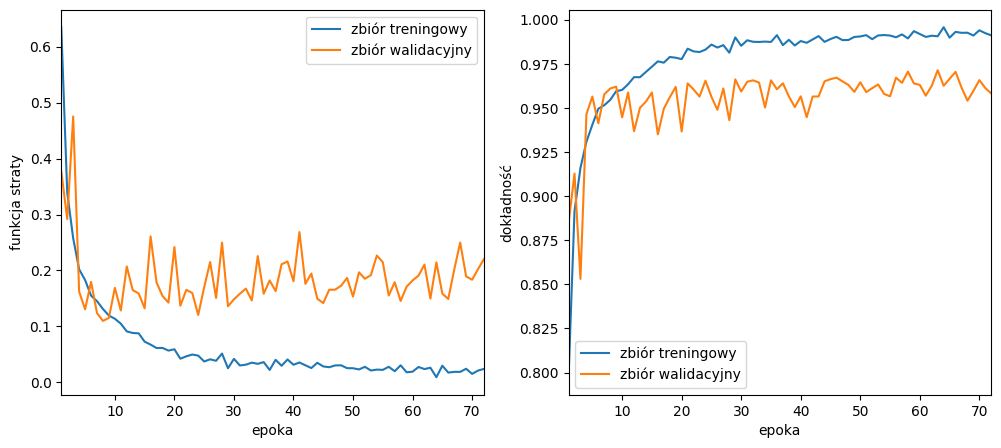

In [33]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax[0].plot(df_train.index+1, df_train["train loss"], label = "zbiór treningowy")
ax[0].plot(df_train.index+1, df_train["test loss"], label = "zbiór walidacyjny")
ax[0].set_xlim([1,len(df_train)])
ax[0].legend()
ax[0].set_xlabel("epoka")
ax[0].set_ylabel("funkcja straty")
ax[1].plot(df_train.index+1, df_train["train accuracy"], label = "zbiór treningowy")
ax[1].plot(df_train.index+1, df_train["test accuracy"], label = "zbiór walidacyjny")
ax[1].set_xlim([1,len(df_train)])
ax[1].legend()
ax[1].set_xlabel("epoka")
ax[1].set_ylabel("dokładność")
plt.show()

In [34]:
from torchvision.datasets import EuroSAT
from torchvision.transforms import v2
from src.EuroSat_dataloaders import Train_Dataset_EuroSat,Test_Dataset_EuroSat,Validation_Dataset_EuroSat
import torch
from src.EuroSat_dataloaders import transformation_eurosat

transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


<AxesSubplot: >

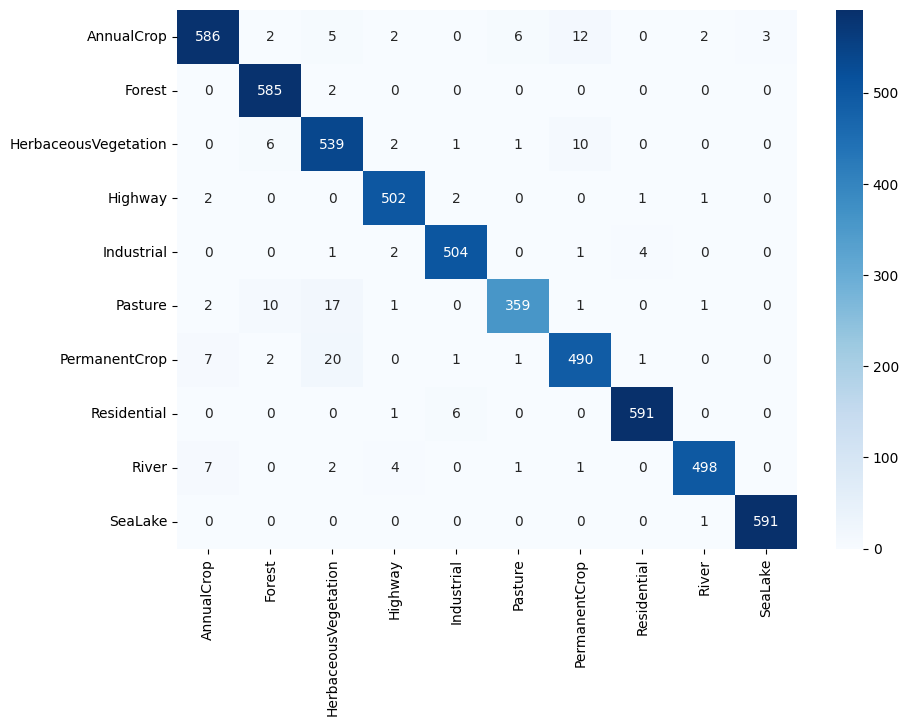

In [35]:
df_pred = pd.read_csv("finished\ResNet50_new\\pred_valid.csv")
ds_test = Validation_Dataset_EuroSat(ds)
true_val = []
pred_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())
    pred_val.append(df_pred.iloc[i].argmax())
conf = confusion_matrix(true_val,pred_val)
df_cm = pd.DataFrame(conf, index = DS_LABELS,columns = DS_LABELS)
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')

In [36]:
precision_recall_fscore_support(true_val,pred_val, average='macro')

(0.9716093164460602, 0.9695819955657068, 0.9704034350072128, None)

In [37]:
accuracy_score(true_val,pred_val)

0.9712962962962963

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


<AxesSubplot: >

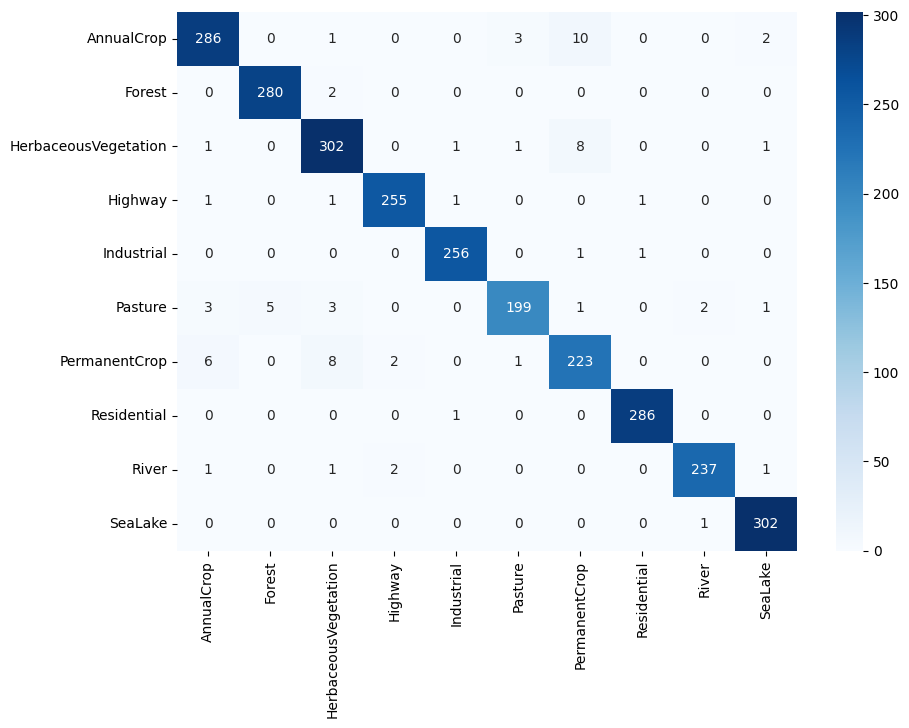

In [38]:
df_pred = pd.read_csv("finished\ResNet50_new\\pred_test.csv")
ds_test = Test_Dataset_EuroSat(ds)
true_val = []
pred_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())
    pred_val.append(df_pred.iloc[i].argmax())
conf = confusion_matrix(true_val,pred_val)
df_cm = pd.DataFrame(conf, index = DS_LABELS,columns = DS_LABELS)
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')


In [39]:
precision_recall_fscore_support(true_val,pred_val, average='macro')

(0.9722300771473081, 0.9710142556137497, 0.9715466249455533, None)

In [40]:
accuracy_score(true_val,pred_val)

0.9722325064790818

In [41]:
false_lst = []
for i in range(len(pred_val)):
    if true_val[i] != pred_val[i]:
        false_lst.append((true_val[i],pred_val[i],i))
print(false_lst)
print(len(false_lst))

[(3, 7, 5), (0, 9, 8), (0, 6, 183), (0, 6, 331), (9, 8, 466), (1, 2, 490), (6, 2, 524), (0, 2, 620), (6, 5, 633), (8, 9, 636), (6, 0, 672), (0, 6, 736), (8, 3, 761), (2, 6, 776), (6, 2, 778), (8, 2, 792), (5, 2, 860), (2, 4, 881), (0, 6, 900), (6, 0, 902), (5, 6, 934), (2, 9, 1015), (6, 2, 1023), (5, 1, 1109), (3, 4, 1159), (8, 0, 1160), (2, 6, 1190), (6, 2, 1230), (5, 8, 1236), (5, 2, 1268), (6, 0, 1284), (5, 9, 1293), (5, 2, 1303), (6, 3, 1305), (0, 6, 1332), (2, 6, 1366), (7, 4, 1509), (6, 0, 1526), (6, 2, 1565), (5, 0, 1585), (0, 6, 1634), (5, 0, 1692), (5, 1, 1693), (5, 0, 1748), (6, 2, 1781), (2, 6, 1825), (0, 6, 1843), (0, 6, 1877), (5, 1, 1920), (5, 8, 1925), (2, 6, 1974), (2, 0, 2095), (1, 2, 2118), (0, 6, 2134), (4, 6, 2140), (2, 6, 2190), (0, 5, 2239), (6, 0, 2281), (0, 9, 2301), (8, 3, 2311), (2, 6, 2321), (3, 0, 2333), (6, 2, 2339), (2, 6, 2340), (5, 1, 2381), (6, 3, 2396), (5, 1, 2420), (2, 5, 2431), (3, 2, 2532), (4, 7, 2541), (0, 6, 2545), (0, 5, 2569), (0, 5, 2626), (6

# VGG-16

In [42]:
df_train = pd.read_csv("finished\\VGG16\\train_data.csv")
df_train.head()

,train loss,test loss,train accuracy,test accuracy
0,0.566514,0.359088,0.831800,0.891765
1,0.375669,0.293523,0.901332,0.925481
2,0.318608,0.353069,0.919786,0.928316
3,0.250331,0.428842,0.936125,0.919995
4,0.235381,0.499690,0.941571,0.921413


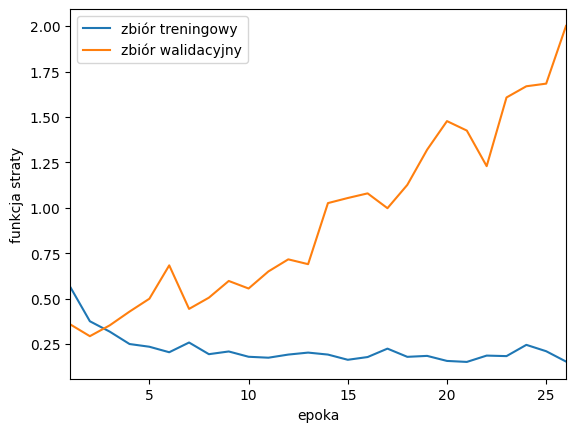

In [43]:
plt.plot(df_train.index+1, df_train["train loss"], label = "zbiór treningowy")
plt.plot(df_train.index+1, df_train["test loss"], label = "zbiór walidacyjny")
plt.xlim([1,26])
plt.legend()
plt.xlabel("epoka")
plt.ylabel("funkcja straty")
plt.show()

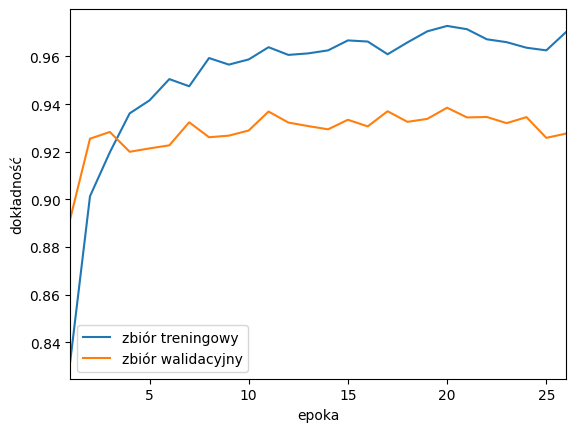

In [44]:
plt.plot(df_train.index+1, df_train["train accuracy"], label = "zbiór treningowy")
plt.plot(df_train.index+1, df_train["test accuracy"], label = "zbiór walidacyjny")
plt.xlim([1,26])
plt.legend()
plt.xlabel("epoka")
plt.ylabel("dokładność")
plt.show()

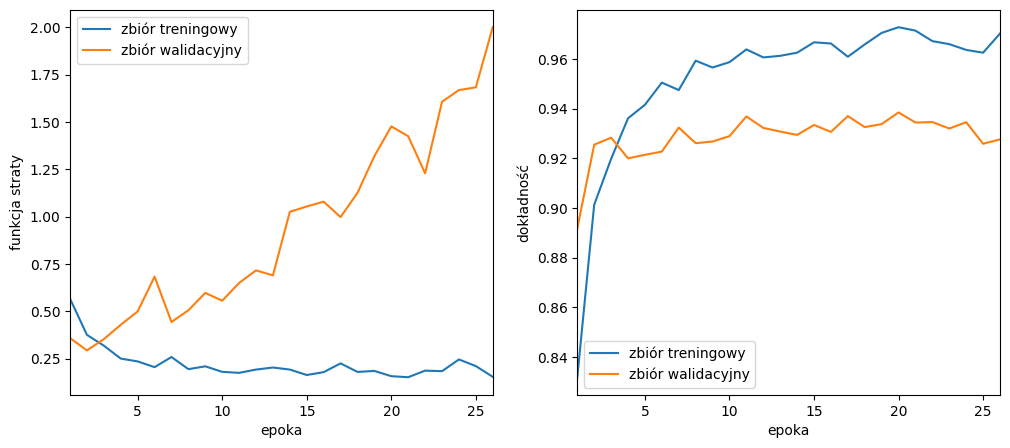

In [45]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax[0].plot(df_train.index+1, df_train["train loss"], label = "zbiór treningowy")
ax[0].plot(df_train.index+1, df_train["test loss"], label = "zbiór walidacyjny")
ax[0].set_xlim([1,26])
ax[0].legend()
ax[0].set_xlabel("epoka")
ax[0].set_ylabel("funkcja straty")
ax[1].plot(df_train.index+1, df_train["train accuracy"], label = "zbiór treningowy")
ax[1].plot(df_train.index+1, df_train["test accuracy"], label = "zbiór walidacyjny")
ax[1].set_xlim([1,26])
ax[1].legend()
ax[1].set_xlabel("epoka")
ax[1].set_ylabel("dokładność")
plt.show()

In [46]:
from torchvision.datasets import EuroSAT
from torchvision.transforms import v2
from src.EuroSat_dataloaders import Train_Dataset_EuroSat,Test_Dataset_EuroSat
import torch
from src.EuroSat_dataloaders import transformation_eurosat

transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


<AxesSubplot: >

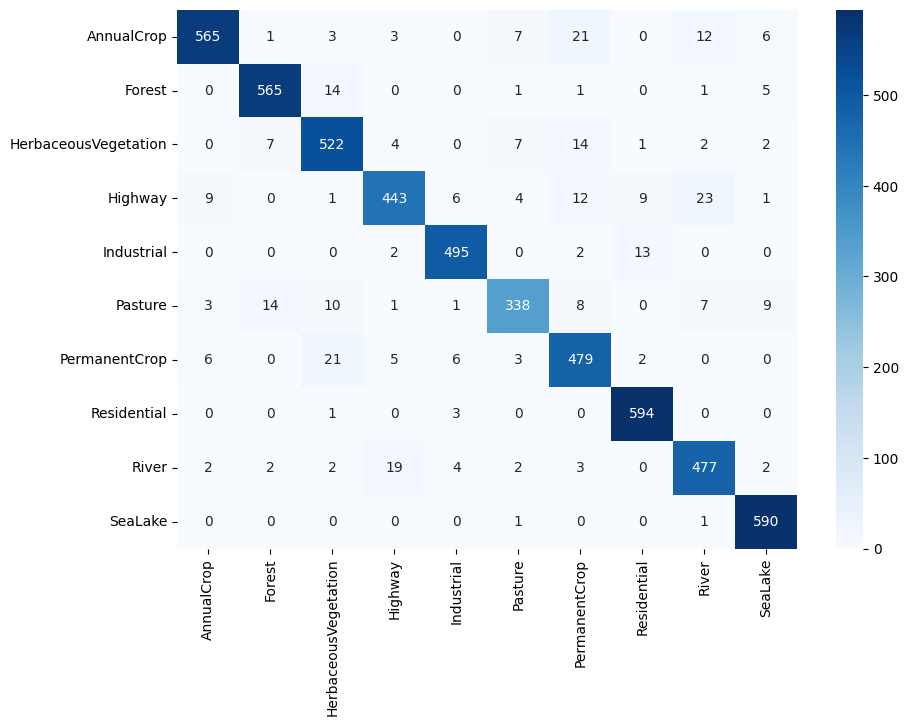

In [47]:
df_pred = pd.read_csv("finished\VGG16\\pred_valid.csv")
ds_test = Validation_Dataset_EuroSat(ds)
true_val = []
pred_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())
    pred_val.append(df_pred.iloc[i].argmax())
conf = confusion_matrix(true_val,pred_val)
df_cm = pd.DataFrame(conf, index = DS_LABELS,columns = DS_LABELS)
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')

In [48]:
precision_recall_fscore_support(true_val,pred_val, average='macro')

(0.9373533099088457, 0.9351247140449347, 0.9358389439917023, None)

In [49]:
accuracy_score(true_val,pred_val)

0.9385185185185185

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


<AxesSubplot: >

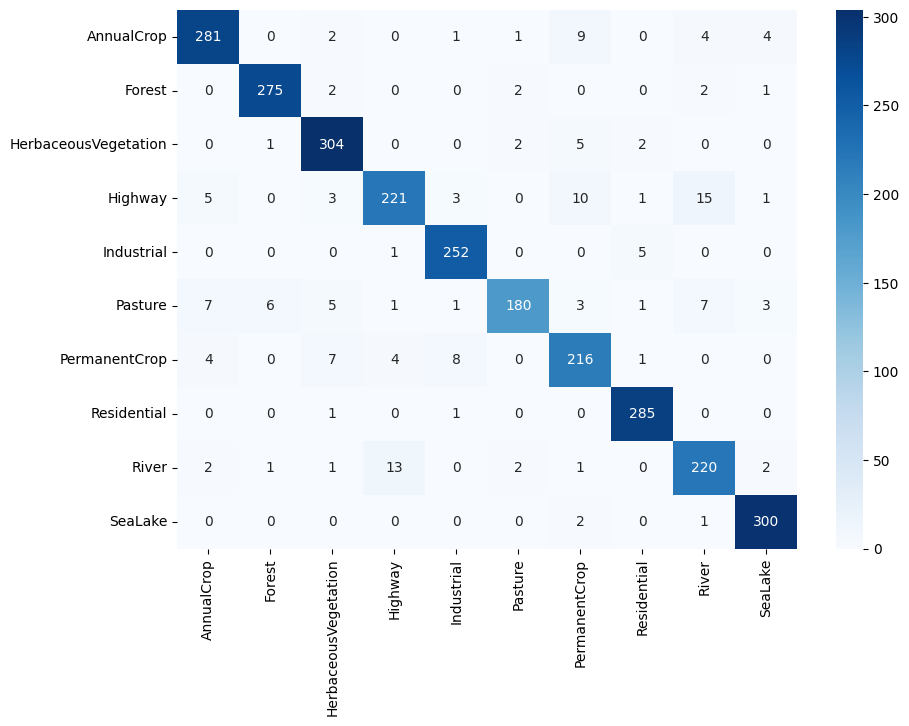

In [50]:
df_pred = pd.read_csv("finished\VGG16\\pred_test.csv")
ds_test = Test_Dataset_EuroSat(ds)
true_val = []
pred_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())
    pred_val.append(df_pred.iloc[i].argmax())
conf = confusion_matrix(true_val,pred_val)
df_cm = pd.DataFrame(conf, index = DS_LABELS,columns = DS_LABELS)
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, cmap="Blues", annot=True, fmt='g')

In [51]:
precision_recall_fscore_support(true_val,pred_val, average='macro')

(0.9369998831586926, 0.9337162559897901, 0.9347004769093287, None)

In [52]:
accuracy_score(true_val,pred_val)

0.9381710477600889

In [53]:
false_lst = []
for i in range(len(pred_val)):
    if true_val[i] != pred_val[i]:
        false_lst.append((true_val[i],pred_val[i],i))
print(false_lst)
print(len(false_lst))

[(8, 1, 34), (5, 0, 35), (3, 8, 36), (9, 6, 58), (1, 5, 69), (5, 2, 109), (6, 2, 110), (8, 3, 125), (8, 6, 129), (8, 3, 139), (3, 6, 182), (7, 2, 203), (1, 8, 230), (3, 6, 235), (3, 2, 247), (6, 2, 248), (2, 5, 255), (3, 8, 289), (5, 8, 292), (0, 8, 335), (0, 6, 402), (6, 4, 403), (8, 3, 420), (5, 9, 449), (0, 6, 457), (9, 8, 466), (3, 6, 485), (3, 6, 492), (6, 4, 514), (3, 8, 541), (6, 4, 577), (0, 9, 588), (6, 2, 599), (6, 3, 606), (0, 2, 620), (6, 0, 633), (8, 9, 636), (6, 0, 672), (4, 3, 691), (2, 1, 713), (0, 6, 736), (3, 8, 747), (3, 6, 769), (2, 6, 776), (5, 0, 821), (0, 8, 836), (8, 3, 847), (8, 3, 879), (1, 5, 888), (0, 6, 900), (3, 4, 928), (5, 0, 934), (6, 4, 936), (5, 3, 966), (5, 9, 986), (8, 0, 988), (3, 4, 993), (3, 8, 1006), (9, 6, 1012), (6, 4, 1058), (5, 8, 1072), (0, 2, 1074), (1, 9, 1078), (5, 1, 1109), (4, 7, 1129), (2, 6, 1146), (3, 2, 1150), (8, 3, 1160), (5, 6, 1181), (3, 6, 1194), (6, 7, 1230), (8, 3, 1235), (5, 8, 1236), (8, 3, 1244), (5, 2, 1268), (3, 8, 1276